## 1️⃣ Import Libraries

We begin by importing all the necessary libraries for data manipulation, visualization, preprocessing, and modeling.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# Settings
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("All libraries imported successfully.")

All libraries imported successfully.


---

## 2️⃣ Load Dataset

Load the hotel booking dataset from the CSV file and perform an initial exploration to understand its structure, size, data types, and summary statistics.

In [3]:
# Load the dataset
df = pd.read_csv("dataset.csv")

# Display first 5 rows
print("First 5 Rows of the Dataset:")
df.head()

First 5 Rows of the Dataset:


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
# Dataset shape
print(f" Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

# Data types and non-null counts
print("ℹ Dataset Info:")
df.info()

 Dataset Shape: 36285 rows × 17 columns

ℹ Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  str    
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  str    
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  str    
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  str    
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price  

In [5]:
# Statistical summary
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


---

## 3️⃣ Data Preprocessing

In this section we:
- Check for **null / missing values** and handle them.
- **Strip whitespace** from categorical columns to avoid inconsistencies.
- **Drop the `Booking_ID`** column (it is just a row identifier with no predictive power).
- **Convert `date of reservation`** to datetime format.
- **Extract the reservation month** into a new column for potential seasonality patterns.
- **Drop the original date column** after extraction.

In [6]:
# --- 3.1 Check for Missing Values ---
print("Missing Values per Column:\n")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found ")
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing Values per Column:

No missing values found 

Total missing values: 0


In [7]:
# --- 3.2 Strip Whitespace from Categorical Columns ---
categorical_cols = df.select_dtypes(include="object").columns.tolist()
for col in categorical_cols:
    df[col] = df[col].str.strip()

print(f" Stripped whitespace from {len(categorical_cols)} categorical columns: {categorical_cols}")

 Stripped whitespace from 6 categorical columns: ['Booking_ID', 'type of meal', 'room type', 'market segment type', 'date of reservation', 'booking status']


In [ ]:
# --- 3.3 Drop Booking_ID Column ---
df.drop(columns=["Booking_ID"], inplace=True)
print("'Booking_ID' column dropped (identifier, not a feature).")

# --- 3.4 Convert 'date of reservation' to datetime & extract month ---
# Using errors='coerce' to handle any invalid dates (e.g., Feb 29 in non-leap years)
df["date of reservation"] = pd.to_datetime(df["date of reservation"], format="mixed", dayfirst=False, errors="coerce")

# Drop rows where date parsing failed (invalid dates become NaT)
invalid_dates = df["date of reservation"].isna().sum()
if invalid_dates > 0:
    print(f" {invalid_dates} rows with invalid dates found and removed.")
    df.dropna(subset=["date of reservation"], inplace=True)

df["reservation_month"] = df["date of reservation"].dt.month
df.drop(columns=["date of reservation"], inplace=True)

print("Converted date column → extracted 'reservation_month' → dropped original date column.")
print(f"\n Updated shape: {df.shape}")
df.head()

'Booking_ID' column dropped (identifier, not a feature).
⚠️ 37 rows with invalid dates found and removed.
Converted date column → extracted 'reservation_month' → dropped original date column.

 Updated shape: (36248, 16)


,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,reservation_month
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,10
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,11
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,2
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,5
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,4


---

## 4️⃣ Outlier Handling (IQR Method)

**Why IQR?**  
The Interquartile Range (IQR) method is a robust, non-parametric technique for detecting outliers. It does not assume any distribution and uses the spread of the middle 50% of data:

- **Q1** = 25th percentile, **Q3** = 75th percentile  
- **IQR** = Q3 − Q1  
- **Lower bound** = Q1 − 1.5 × IQR  
- **Upper bound** = Q3 + 1.5 × IQR  

Values outside these bounds are considered outliers and are removed to prevent them from skewing the model.

Shape BEFORE outlier removal: (36248, 16)


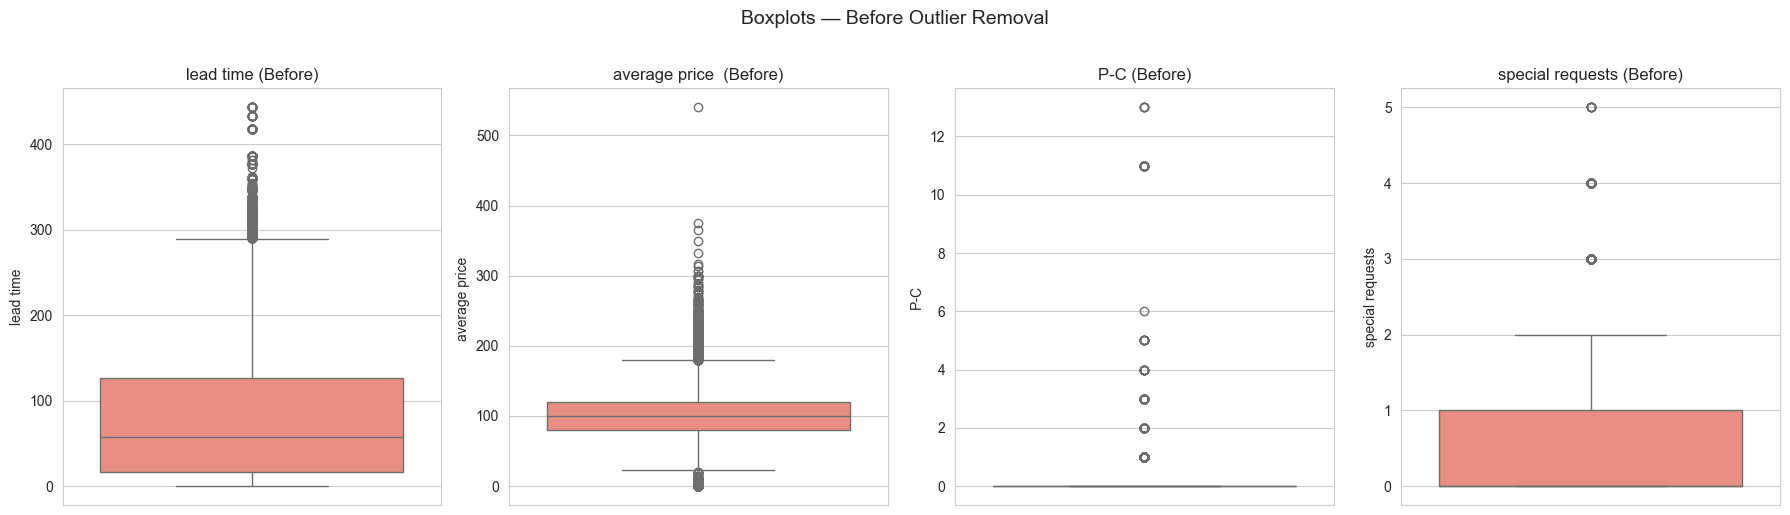

In [9]:
# Columns to check for outliers
outlier_cols = ["lead time", "average price ", "P-C", "special requests"]

print(f"Shape BEFORE outlier removal: {df.shape}")

# Visualize boxplots before removal
fig, axes = plt.subplots(1, len(outlier_cols), figsize=(18, 5))
for i, col in enumerate(outlier_cols):
    sns.boxplot(y=df[col], ax=axes[i], color="salmon")
    axes[i].set_title(f"{col} (Before)")
plt.suptitle("Boxplots — Before Outlier Removal", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [10]:
# Apply IQR method to remove outliers
def remove_outliers_iqr(dataframe, columns):
    """Remove rows with outlier values using the IQR method."""
    df_clean = dataframe.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        before = len(df_clean)
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        after = len(df_clean)
        print(f"  {col}: removed {before - after} outliers  (bounds: [{lower_bound:.2f}, {upper_bound:.2f}])")
    return df_clean

print("Removing outliers using IQR method:\n")
df = remove_outliers_iqr(df, outlier_cols)
df.reset_index(drop=True, inplace=True)

print(f"\nShape AFTER outlier removal: {df.shape}")

Removing outliers using IQR method:

  lead time: removed 1332 outliers  (bounds: [-146.50, 289.50])
  average price : removed 1604 outliers  (bounds: [19.62, 182.62])
  P-C: removed 293 outliers  (bounds: [0.00, 0.00])
  special requests: removed 675 outliers  (bounds: [-1.50, 2.50])

Shape AFTER outlier removal: (32344, 16)


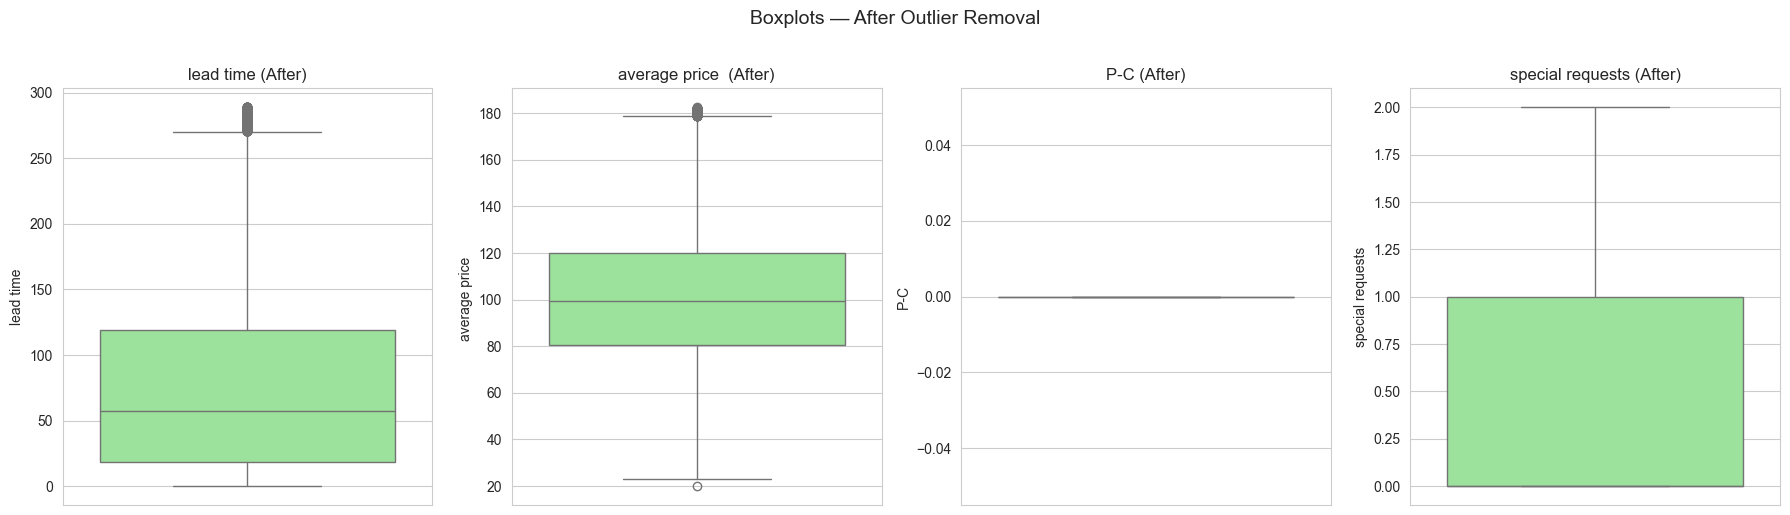

In [11]:
# Visualize boxplots after removal
fig, axes = plt.subplots(1, len(outlier_cols), figsize=(18, 5))
for i, col in enumerate(outlier_cols):
    sns.boxplot(y=df[col], ax=axes[i], color="lightgreen")
    axes[i].set_title(f"{col} (After)")
plt.suptitle("Boxplots — After Outlier Removal", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

---

## 5️⃣ Feature Engineering

We select meaningful features that are relevant predictors for booking cancellation.

**Why drop `Booking_ID`?**  
`Booking_ID` is a unique identifier assigned to each record. It carries no statistical relationship with the target variable and would only add noise to the model. Including it could lead to overfitting, as the model might memorize IDs instead of learning patterns.

All remaining columns after preprocessing are kept as features — they represent guest behavior, booking characteristics, and reservation details that may influence cancellation.

In [12]:
# Review current columns
print("Current Features in the Dataset:\n")
for i, col in enumerate(df.columns, 1):
    dtype = "Numerical" if df[col].dtype in ["int64", "float64"] else "Categorical"
    print(f"  {i:2d}. {col:<30s} ({dtype})")

print(f"\n Total features: {df.shape[1] - 1} + 1 target ('booking status')")
print(f" Total samples : {df.shape[0]}")

Current Features in the Dataset:

   1. number of adults               (Numerical)
   2. number of children             (Numerical)
   3. number of weekend nights       (Numerical)
   4. number of week nights          (Numerical)
   5. type of meal                   (Categorical)
   6. car parking space              (Numerical)
   7. room type                      (Categorical)
   8. lead time                      (Numerical)
   9. market segment type            (Categorical)
  10. repeated                       (Numerical)
  11. P-C                            (Numerical)
  12. P-not-C                        (Numerical)
  13. average price                  (Numerical)
  14. special requests               (Numerical)
  15. booking status                 (Categorical)
  16. reservation_month              (Categorical)

 Total features: 15 + 1 target ('booking status')
 Total samples : 32344


---

## 6️⃣ Categorical Encoding

**Why is encoding necessary?**  
Machine learning algorithms work with numerical inputs. Categorical (text) features must be converted to numbers. We use:

- **Label Encoding** for the binary target: `Canceled → 1`, `Not_Canceled → 0`.
- **One-Hot Encoding** for nominal categorical features (e.g., meal type, room type, market segment).


In [13]:
# --- 6.1 Encode the Target Variable ---
df["booking status"] = df["booking status"].map({"Canceled": 1, "Not_Canceled": 0})
print("Target variable encoded:  Canceled → 1  |  Not_Canceled → 0")
print(df["booking status"].value_counts())

Target variable encoded:  Canceled → 1  |  Not_Canceled → 0
booking status
0    21936
1    10408
Name: count, dtype: int64


In [14]:
# --- 6.2 One-Hot Encode Categorical Features ---
cat_features = df.select_dtypes(include="object").columns.tolist()
print(f" Applying One-Hot Encoding to: {cat_features}\n")

df = pd.get_dummies(df, columns=cat_features, drop_first=True, dtype=int)

print(f"Encoding complete. New shape: {df.shape}")
print(f"\n Columns after encoding:")
print(df.columns.tolist())

 Applying One-Hot Encoding to: ['type of meal', 'room type', 'market segment type']

Encoding complete. New shape: (32344, 25)

 Columns after encoding:
['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'car parking space', 'lead time', 'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests', 'booking status', 'reservation_month', 'type of meal_Meal Plan 2', 'type of meal_Not Selected', 'room type_Room_Type 2', 'room type_Room_Type 3', 'room type_Room_Type 4', 'room type_Room_Type 5', 'room type_Room_Type 6', 'room type_Room_Type 7', 'market segment type_Complementary', 'market segment type_Corporate', 'market segment type_Offline', 'market segment type_Online']


---

## 7️⃣ Train-Test Split

**Why do we split the data?**  
We split the dataset into **training** and **testing** sets to evaluate the model on unseen data, which gives a realistic estimate of its generalization performance.

- **80%** of the data is used for training.
- **20%** is held out for testing.
- `random_state=42` ensures reproducibility.

In [15]:
# Define features (X) and target (y)
X = df.drop(columns=["booking status"])
y = df["booking status"]

# Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print(f" Train-Test Split Complete")
print(f"   Training set : {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"   Testing set  : {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"   Features     : {X_train.shape[1]}")
print(f"\n   Target distribution (train):\n{y_train.value_counts(normalize=True).round(3)}")

 Train-Test Split Complete
   Training set : 25875 samples (80.0%)
   Testing set  : 6469 samples (20.0%)
   Features     : 24

   Target distribution (train):
booking status
0    0.678
1    0.322
Name: proportion, dtype: float64


---

## 8️⃣ Feature Scaling

**Why is scaling needed?**  
- Algorithms like **Logistic Regression** use gradient-based optimization, which converges faster with scaled features.
- Features with different ranges (e.g., `lead time` 0–500 vs. `special requests` 0–5) can dominate the model unfairly.
- **StandardScaler** transforms features to have mean = 0 and standard deviation = 1.

**Important:** We fit the scaler on **training data only** and transform both train and test sets to **prevent data leakage**.

In [16]:
# Identify numerical columns to scale
numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Initialize and fit scaler on training data ONLY
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(f" StandardScaler applied to {len(numerical_cols)} numerical columns.")
print(f"   Scaler fitted on training data only (no data leakage).\n")
print(" Sample of scaled training data:")
X_train.head()

 StandardScaler applied to 23 numerical columns.
   Scaler fitted on training data only (no data leakage).

 Sample of scaled training data:


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
27951,0.301459,-0.232963,-0.949269,-0.149149,-0.175015,0.024288,-0.122411,0.0,-0.083274,1.208516,...,-0.1385,-0.013902,2.203196,-0.083697,-0.11828,-0.023267,-0.018653,-0.245337,1.575001,-1.367675
28360,0.301459,-0.232963,-0.949269,0.552784,-0.175015,-0.071833,-0.122411,0.0,-0.083274,0.119353,...,-0.1385,-0.013902,-0.453886,-0.083697,-0.11828,-0.023267,-0.018653,-0.245337,-0.634920,0.731168
1677,-1.642284,-0.232963,0.192740,-1.553014,-0.175015,-1.019311,-0.122411,0.0,-0.083274,1.497995,...,-0.1385,-0.013902,-0.453886,-0.083697,-0.11828,-0.023267,-0.018653,-0.245337,1.575001,-1.367675
14232,0.301459,2.691790,0.192740,0.552784,-0.175015,0.175335,-0.122411,0.0,-0.083274,1.139765,...,-0.1385,-0.013902,-0.453886,-0.083697,-0.11828,-0.023267,-0.018653,-0.245337,-0.634920,0.731168
1666,0.301459,-0.232963,1.334750,-0.149149,-0.175015,0.738329,-0.122411,0.0,-0.083274,-1.699658,...,-0.1385,-0.013902,-0.453886,-0.083697,-0.11828,-0.023267,-0.018653,-0.245337,-0.634920,0.731168


---

## 9️⃣ Modeling

We train and evaluate three classification models:

| # | Model | Description |
|---|-------|-------------|
| 1 | **Logistic Regression** | A linear model ideal for binary classification baselines. |
| 2 | **Random Forest** | An ensemble of decision trees that reduces overfitting via bagging. |
| 3 | **Decision Tree** | A simple, interpretable tree-based model. |

For each model we compute: **Accuracy, Precision, Recall, F1-Score** and display a **Confusion Matrix**.

In [17]:
# Helper function to train, evaluate, and display results for a model
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    """Train a model, predict, and return evaluation metrics with confusion matrix."""
    # Train
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print results
    print(f"{'='*55}")
    print(f"   {model_name}")
    print(f"{'='*55}")
    print(f"  Accuracy  : {acc:.4f}")
    print(f"  Precision : {prec:.4f}")
    print(f"  Recall    : {rec:.4f}")
    print(f"  F1-Score  : {f1:.4f}")
    print(f"\n  Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Not Canceled", "Canceled"]))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Not Canceled", "Canceled"],
                yticklabels=["Not Canceled", "Canceled"])
    plt.title(f"Confusion Matrix — {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    return {"Model": model_name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-Score": f1}

# Store results for comparison
results = []

### 9.1 Logistic Regression

   Logistic Regression
  Accuracy  : 0.7898
  Precision : 0.7114
  Recall    : 0.5836
  F1-Score  : 0.6412

  Classification Report:
              precision    recall  f1-score   support

Not Canceled       0.82      0.89      0.85      4387
    Canceled       0.71      0.58      0.64      2082

    accuracy                           0.79      6469
   macro avg       0.76      0.74      0.75      6469
weighted avg       0.78      0.79      0.78      6469



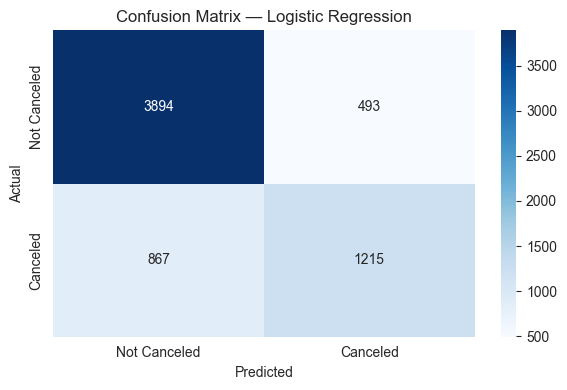

In [18]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
results.append(evaluate_model(lr_model, "Logistic Regression", X_train, X_test, y_train, y_test))

### 9.2 Random Forest

   Random Forest
  Accuracy  : 0.8921
  Precision : 0.8669
  Recall    : 0.7853
  F1-Score  : 0.8241

  Classification Report:
              precision    recall  f1-score   support

Not Canceled       0.90      0.94      0.92      4387
    Canceled       0.87      0.79      0.82      2082

    accuracy                           0.89      6469
   macro avg       0.88      0.86      0.87      6469
weighted avg       0.89      0.89      0.89      6469



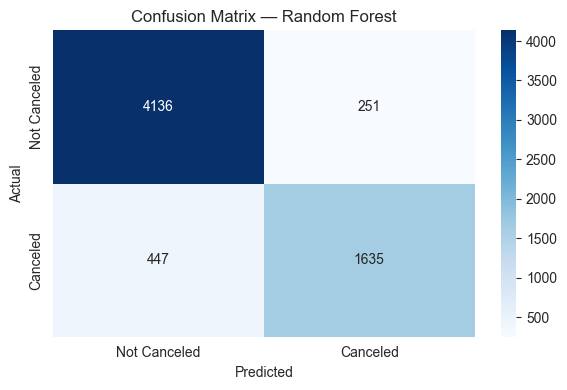

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
results.append(evaluate_model(rf_model, "Random Forest", X_train, X_test, y_train, y_test))

### 9.3 Decision Tree

   Decision Tree
  Accuracy  : 0.8552
  Precision : 0.7762
  Recall    : 0.7728
  F1-Score  : 0.7745

  Classification Report:
              precision    recall  f1-score   support

Not Canceled       0.89      0.89      0.89      4387
    Canceled       0.78      0.77      0.77      2082

    accuracy                           0.86      6469
   macro avg       0.83      0.83      0.83      6469
weighted avg       0.85      0.86      0.86      6469



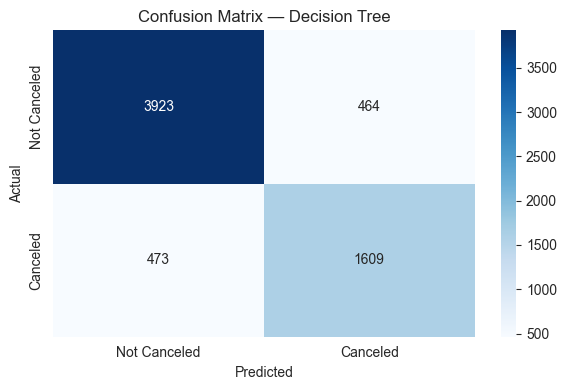

In [20]:
dt_model = DecisionTreeClassifier(random_state=42)
results.append(evaluate_model(dt_model, "Decision Tree", X_train, X_test, y_train, y_test))

---

## 🔟 Model Comparison

We compare all three models side-by-side on the key evaluation metrics and identify the best-performing model.

In [21]:
# Build comparison DataFrame
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

# Format and display the comparison table
print(" Model Performance Comparison:\n")
display_df = comparison_df.copy()
for col in ["Accuracy", "Precision", "Recall", "F1-Score"]:
    display_df[col] = display_df[col].apply(lambda x: f"{x:.4f}")
print(display_df.to_string(index=False))

 Model Performance Comparison:

              Model Accuracy Precision Recall F1-Score
      Random Forest   0.8921    0.8669 0.7853   0.8241
      Decision Tree   0.8552    0.7762 0.7728   0.7745
Logistic Regression   0.7898    0.7114 0.5836   0.6412


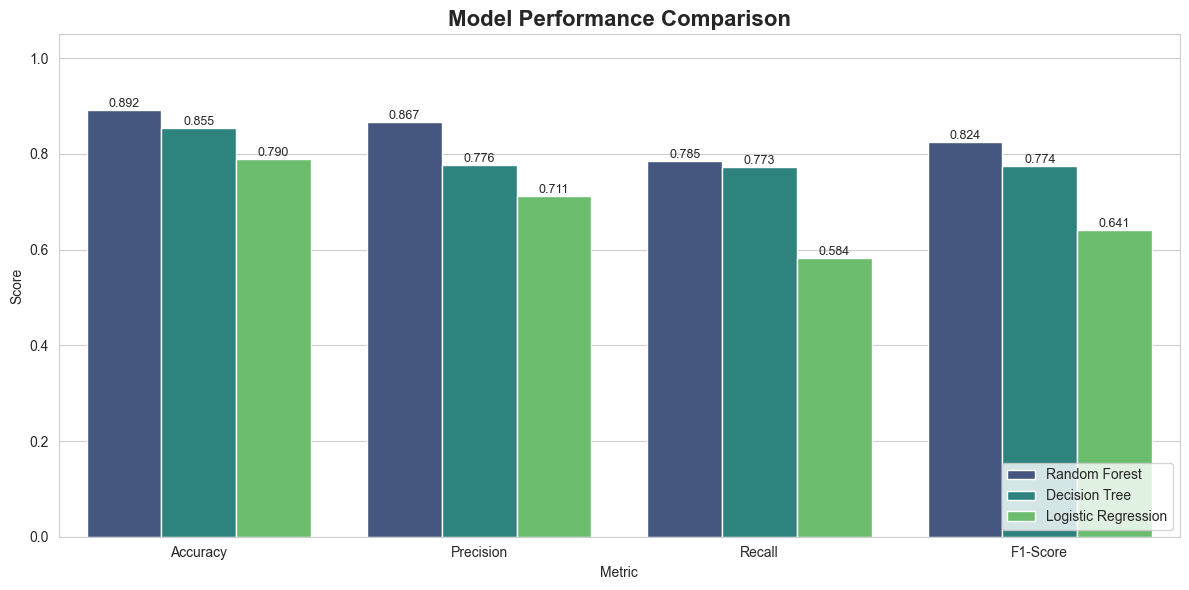

In [22]:
# Visual comparison
fig, ax = plt.subplots(figsize=(12, 6))
comparison_melted = comparison_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(data=comparison_melted, x="Metric", y="Score", hue="Model", palette="viridis", ax=ax)
ax.set_title("Model Performance Comparison", fontsize=16, fontweight="bold")
ax.set_ylim(0, 1.05)
ax.legend(loc="lower right")
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", fontsize=9)
plt.tight_layout()
plt.show()

In [ ]:
# Identify the best model
best = comparison_df.iloc[0]
print(f"   Best Performing Model: {best['Model']}")
print(f"   Accuracy  : {best['Accuracy']:.4f}")
print(f"   Precision : {best['Precision']:.4f}")
print(f"   Recall    : {best['Recall']:.4f}")
print(f"   F1-Score  : {best['F1-Score']:.4f}")

🏆 Best Performing Model: Random Forest
   Accuracy  : 0.8921
   Precision : 0.8669
   Recall    : 0.7853
   F1-Score  : 0.8241
